In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Here is a brief description for all performance columns in the data set:

* Impressions ­ Number of time the ad was shown

* SearchEngineClicks ­ Number of time the ad clicked shown (also referred to as Clicks)

* Cost ­ Amount spent to show ad

* CTR ­ Clicks / Impression (higher the better)

* CPC ­ Cost / Click (lower the better)

* Conv ­ Number of transactions received (higher the better)

* Revenue ­ Total value of transactions received (higher the better)

In [48]:
# load dataset
data = pd.read_csv('./ad-dump-8months.csv', parse_dates=['Date']); data.head()

,Date,Ad Title,Campaign Name,AdGroup Name,Impressions,SearchEngineClicks,Cost,CTR,CPC,Conv,Revenue
0,2015-09-08,AD1-DNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNews...,32,4,168.30,12.500000,42.0750,0,0
1,2015-09-08,AD2-DNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNews...,62,4,133.26,6.451613,33.3150,0,0
2,2015-09-08,AD1-MNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed,110,8,171.82,7.272727,21.4775,0,0
3,2015-09-08,AD2-MNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed,41,2,68.60,4.878049,34.3000,0,0
4,2015-09-08,AD1-RHS,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRigh...,54,0,0.00,0.000000,0.0000,0,0


In [7]:
# max and min date

print 'Min Date %s and Max Date %s' %(data.Date.min(), data.Date.max())

Min Date 2015-01-09 00:00:00 and Max Date 2016-12-03 00:00:00


In [8]:
# count of various ad groups

data['AdGroup Name'].value_counts()

FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed       474
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed        474
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn    473
Name: AdGroup Name, dtype: int64

In [10]:
# count various types of ads

data['Ad Title'].value_counts()

AD2-DNF    237
AD1-RHS    237
AD1-MNF    237
AD1-DNF    237
AD2-MNF    237
AD2-RHS    236
Name: Ad Title, dtype: int64

## Add day of the week as a feature

In [51]:
data.loc[:, 'day_of_week'] = data.Date.dt.dayofweek

## Add Target Variable

In [53]:
data.loc[:, 'ROI'] = data.Revenue / ( 1 + data.Cost )

## Group By AdGroup Name and Ad Title

** Mean and Median CTR **

In [11]:
data.groupby(['AdGroup Name', 'Ad Title'])['CTR'].mean()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF     2.502417
                                                       AD2-DNF     2.720732
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS     0.332678
                                                       AD2-RHS     0.321087
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF     4.364259
                                                       AD2-MNF     4.345299
Name: CTR, dtype: float64

In [12]:
data.groupby(['AdGroup Name', 'Ad Title'])['CTR'].median()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF     2.481949
                                                       AD2-DNF     2.749095
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS     0.319470
                                                       AD2-RHS     0.310252
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF     4.350913
                                                       AD2-MNF     4.413324
Name: CTR, dtype: float64

** Mean and Median CPC **

In [14]:
data.groupby(['AdGroup Name', 'Ad Title'])['CPC'].mean()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF     16.709316
                                                       AD2-DNF     16.241423
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS     13.914755
                                                       AD2-RHS     14.063630
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF      6.345740
                                                       AD2-MNF      6.411255
Name: CPC, dtype: float64

In [15]:
data.groupby(['AdGroup Name', 'Ad Title'])['CPC'].median()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF     13.831351
                                                       AD2-DNF     13.485915
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS     13.273303
                                                       AD2-RHS     13.348474
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF      5.535929
                                                       AD2-MNF      5.515838
Name: CPC, dtype: float64

** Mean and Median Conv **

In [16]:
data.groupby(['AdGroup Name', 'Ad Title'])['Conv'].mean()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF      5.037975
                                                       AD2-DNF      9.864979
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS      9.548523
                                                       AD2-RHS      8.673729
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF     12.907173
                                                       AD2-MNF     16.717300
Name: Conv, dtype: float64

In [17]:
data.groupby(['AdGroup Name', 'Ad Title'])['Conv'].median()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF      4
                                                       AD2-DNF      8
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS      7
                                                       AD2-RHS      7
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF      9
                                                       AD2-MNF     14
Name: Conv, dtype: int64

** Mean and Median Revenue **

In [18]:
data.groupby(['AdGroup Name', 'Ad Title'])['Revenue'].mean()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF      5779.920295
                                                       AD2-DNF     10190.183502
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS     10647.239662
                                                       AD2-RHS      9167.559449
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF     13575.608354
                                                       AD2-MNF     17334.854557
Name: Revenue, dtype: float64

In [19]:
data.groupby(['AdGroup Name', 'Ad Title'])['CTR'].median()

AdGroup Name                                           Ad Title
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     AD1-DNF     2.481949
                                                       AD2-DNF     2.749095
FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn  AD1-RHS     0.319470
                                                       AD2-RHS     0.310252
FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      AD1-MNF     4.350913
                                                       AD2-MNF     4.413324
Name: CTR, dtype: float64

## Group By Day of week

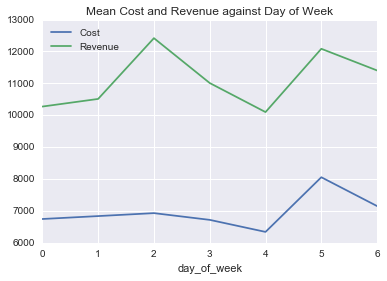

In [33]:
features = ['Cost', 'Revenue']
data.groupby(['day_of_week'])[features].mean().plot()
plt.title('Mean Cost and Revenue against Day of Week 0=Monday and 6=Sunday');

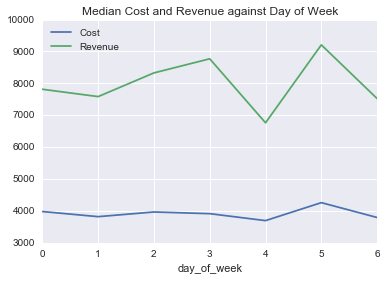

In [34]:
features = ['Cost', 'Revenue']
data.groupby(['day_of_week'])[features].median().plot()
plt.title('Median Cost and Revenue against Day of Week 0=Monday and 6=Sunday');

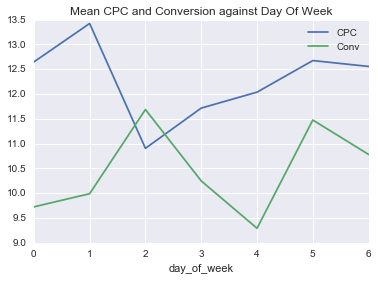

In [36]:
features = ['CPC', 'Conv']

data.groupby(['day_of_week'])[features].mean().plot()
plt.title('Mean CPC and Conversion against Day Of Week 0=Monday and 6=Sunday');

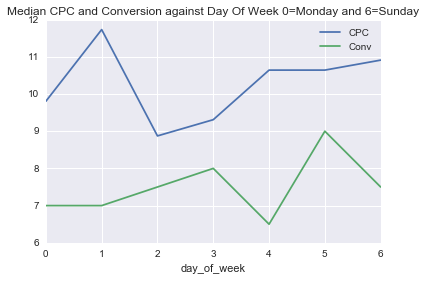

In [63]:
features = ['CPC', 'Conv']

data.groupby(['day_of_week'])[features].median().plot()
plt.title('Median CPC and Conversion against Day Of Week 0=Monday and 6=Sunday');

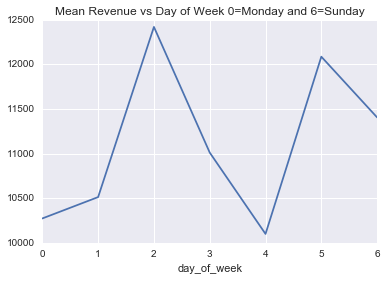

In [64]:
data.groupby(['day_of_week'])['Revenue'].mean().plot()
plt.title('Mean Revenue vs Day of Week 0=Monday and 6=Sunday');

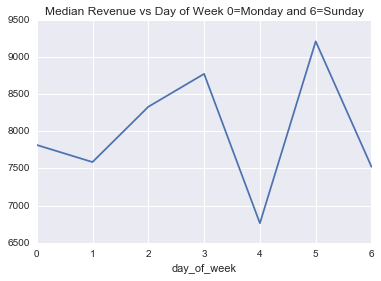

In [65]:
data.groupby(['day_of_week'])['Revenue'].median().plot()
plt.title('Median Revenue vs Day of Week 0=Monday and 6=Sunday');

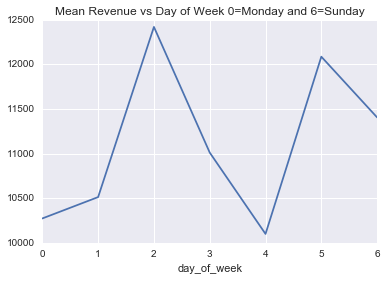

In [66]:
data.groupby(['day_of_week'])['Revenue'].mean().plot()
plt.title('Mean Revenue vs Day of Week 0=Monday and 6=Sunday');

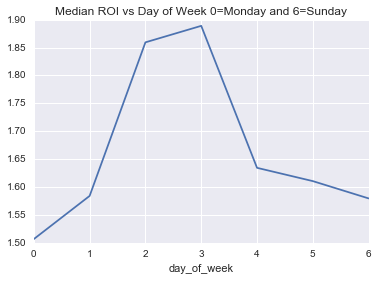

In [67]:
data.groupby(['day_of_week'])['ROI'].median().plot()
plt.title('Median ROI vs Day of Week 0=Monday and 6=Sunday');

## Histograms

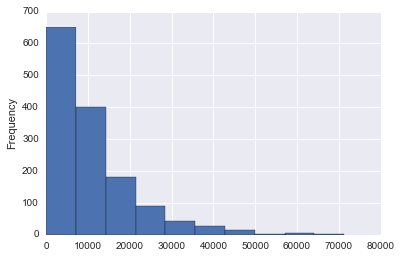

In [49]:
data['Revenue'].plot(kind='hist');

In [42]:
data['Revenue'] = data['Revenue'].map(np.log1p)

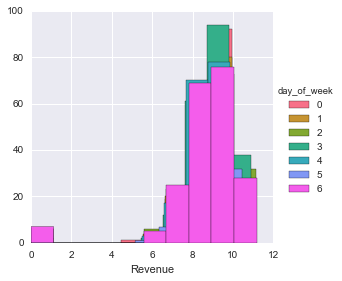

In [43]:
sns.FacetGrid(data, hue='day_of_week', size=4)\
    .map(plt.hist, 'Revenue')\
    .add_legend();

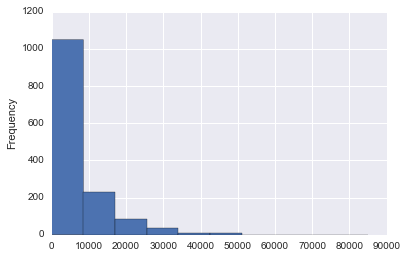

In [50]:
data['Cost'].plot(kind='hist');

In [46]:
data['Cost'] = data['Cost'].map(np.log1p)

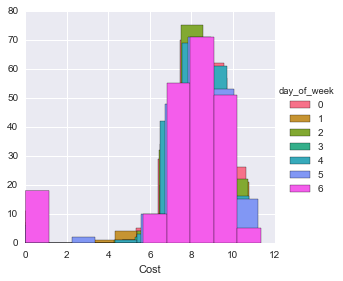

In [47]:
sns.FacetGrid(data, hue='day_of_week', size=4)\
    .map(plt.hist, 'Cost')\
    .add_legend();

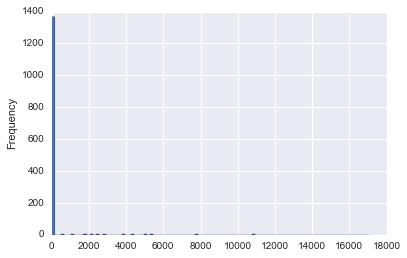

In [62]:
data['ROI'].plot(kind='hist', bins=100);

In [59]:
data['Log_ROI'] = data.ROI.map(np.log1p)

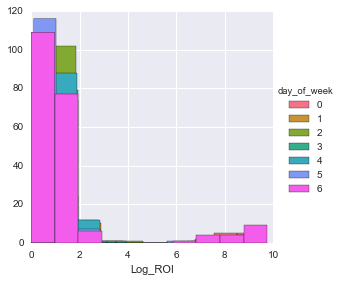

In [60]:
sns.FacetGrid(data, hue='day_of_week', size=4)\
    .map(plt.hist, 'Log_ROI')\
    .add_legend();

In [68]:
data.head()

,Date,Ad Title,Campaign Name,AdGroup Name,Impressions,SearchEngineClicks,Cost,CTR,CPC,Conv,Revenue,day_of_week,ROI,Log_ROI
0,2015-09-08,AD1-DNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNews...,32,4,168.30,12.500000,42.0750,0,0,1,0,0
1,2015-09-08,AD2-DNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNews...,62,4,133.26,6.451613,33.3150,0,0,1,0,0
2,2015-09-08,AD1-MNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed,110,8,171.82,7.272727,21.4775,0,0,1,0,0
3,2015-09-08,AD2-MNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed,41,2,68.60,4.878049,34.3000,0,0,1,0,0
4,2015-09-08,AD1-RHS,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRigh...,54,0,0.00,0.000000,0.0000,0,0,1,0,0


## Create separate datasets for different AdGroups

In [98]:
group1 = data[data['AdGroup Name'] == 'FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed']
group2 = data[data['AdGroup Name'] == 'FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed']
group3 = data[data['AdGroup Name'] == 'FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn']

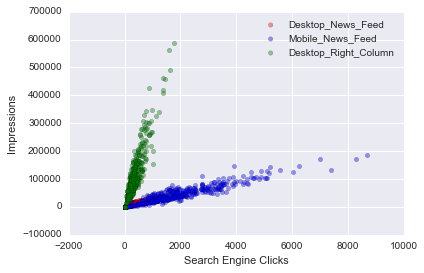

In [102]:
plt.scatter(group1.SearchEngineClicks, group1.Impressions, c='r', alpha=0.4, label='Desktop_News_Feed')
plt.scatter(group2.SearchEngineClicks, group2.Impressions, c='b', alpha=0.4, label='Mobile_News_Feed')
plt.scatter(group3.SearchEngineClicks, group3.Impressions, c='g', alpha=0.4, label='Desktop_Right_Column')
plt.xlabel('Search Engine Clicks')
plt.ylabel('Impressions')
plt.legend(loc='best');

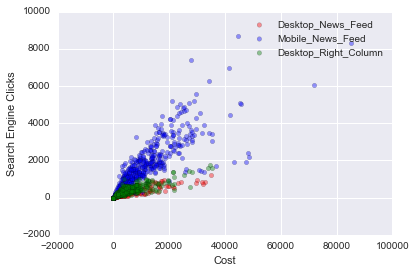

In [103]:
plt.scatter(group1.Cost, group1.SearchEngineClicks, c='r', alpha=0.4, label='Desktop_News_Feed')
plt.scatter(group2.Cost, group2.SearchEngineClicks, c='b', alpha=0.4, label='Mobile_News_Feed')
plt.scatter(group3.Cost, group3.SearchEngineClicks, c='g', alpha=0.4, label='Desktop_Right_Column')
plt.xlabel('Cost')
plt.ylabel('Search Engine Clicks')
plt.legend(loc='best');

## Which ad groups are costliest ?

In [108]:
group1.Cost.mean()

4219.930611814346

In [109]:
group2.Cost.mean()

11682.972995780594

In [110]:
group3.Cost.mean()

5009.67038054968

** Mobile News Feed are the costliest of them **

## Data for Last Month

In [86]:
last_month = data.sort_values(by='Date', ascending=True).iloc[-30:,]

In [87]:
last_month = last_month.set_index('Date')

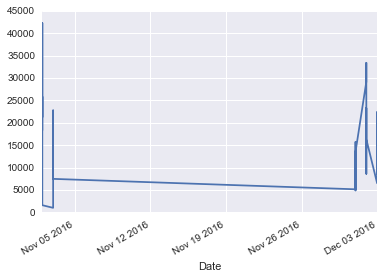

In [88]:
last_month.Revenue.plot();

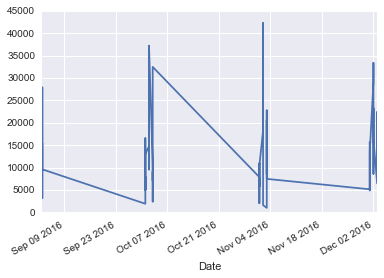

In [89]:
prev_two_months = data.sort_values(by='Date', ascending=True).iloc[-60:,]
prev_two_months = prev_two_months.set_index('Date')
prev_two_months.Revenue.plot();

In [92]:
prev_two_months_group_1 = prev_two_months[prev_two_months['AdGroup Name'] == 'FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed']
prev_two_months_group_2 = prev_two_months[prev_two_months['AdGroup Name'] == 'FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed']
prev_two_months_group_3 = prev_two_months[prev_two_months['AdGroup Name'] == 'FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRightColumn']

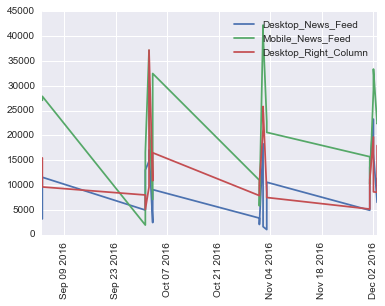

In [96]:
plt.plot(prev_two_months_group_1.Revenue, label='Desktop_News_Feed')
plt.plot(prev_two_months_group_2.Revenue, label='Mobile_News_Feed')
plt.plot(prev_two_months_group_3.Revenue, label='Desktop_Right_Column')
plt.xticks(rotation=90)
plt.legend(loc='best');

## Add month as a feature

In [104]:
data['month'] = data.Date.dt.month

In [195]:
data[data.month == 3][['Revenue', 'Cost']].head()

,Revenue,Cost
150,10492.17,3708.09
151,6550.81,8291.91
152,3938.00,4577.12
153,18575.79,13422.88
154,6762.25,1961.16


In [196]:
march = data[data.month == 3]

In [ ]:
march.Revenue / ( 1 + march.Cost )

In [111]:
per_month = data.groupby(['month', 'AdGroup Name'])[['Cost', 'ROI']].mean()

In [112]:
per_month

Cost  \
month AdGroup Name                                                       
1     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   3693.545185   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   4122.299444   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed    9994.854259   
2     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   2834.070000   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   4209.756383   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   14411.057500   
3     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   2641.679615   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   4980.609423   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   10151.510769   
4     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   3217.483571   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   6214.400714   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   10500.037857   
5     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   3418.820000   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   5044.651429   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed    9951.865000   
6     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   3875.567857   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   5227.130000   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   10189.136429   
7     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   5842.463571   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   5429.367857   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   10425.323571   
8     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   5130.908269   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   6770.072115   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   14216.626538   
9     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   3910.953846   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   4393.047885   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   10467.134038   
10    FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   6890.939630   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   5036.853519   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   10338.788889   
11    FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   3134.321538   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   3386.682308   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed    5939.651923   
12    FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   5428.888704   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   6568.929074   
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   19495.492963   

                                                                  ROI  
month AdGroup Name                                                     
1     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed     2.186901  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...     2.657890  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed      1.634252  
2     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   269.649974  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...    28.221974  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed    169.242995  
3     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   923.243663  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...  1554.641190  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   1821.267695  
4     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed   410.187382  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...  1210.167644  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed   1249.027045  
5     FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNewsFeed  1283.170500  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRight...   548.605277  
      FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed    390.699384  
6     FB2_DPA_DeltaX_Freedom0

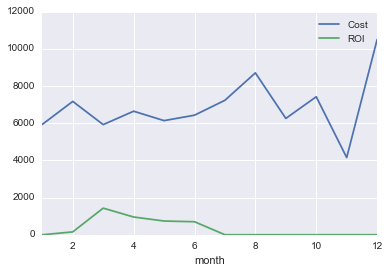

In [132]:
data.groupby(['month'])[['Cost', 'ROI']].mean().plot();

In [123]:
data.groupby(['month'])[['Cost', 'ROI', 'CTR', 'CPC', 'Revenue', 'Conv']].mean()

,Cost,ROI,CTR,CPC,Revenue,Conv
month,,,,,,
1,5936.899630,2.159681,2.861238,9.718455,8931.039383,8.549383
2,7172.200490,156.596470,2.562738,8.472309,13026.665315,12.139860
3,5924.599936,1433.050849,1.833189,10.999161,14241.623974,13.141026
4,6643.974048,956.460690,1.878308,10.684574,10191.070000,10.071429
5,6138.445476,740.825054,1.867401,10.987568,10743.768095,9.880952
6,6430.611429,701.775398,1.915532,12.874960,10761.523095,9.380952
7,7232.385000,2.288836,2.514539,12.645215,12322.195238,11.666667
8,8705.868974,1.627289,2.329905,16.486924,10467.242436,9.987179
9,6257.045256,1.610044,2.145805,14.165407,8556.180064,8.044872


## Model Building

In [149]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [126]:
data.head()

,Date,Ad Title,Campaign Name,AdGroup Name,Impressions,SearchEngineClicks,Cost,CTR,CPC,Conv,Revenue,day_of_week,ROI,Log_ROI,month
0,2015-09-08,AD1-DNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNews...,32,4,168.30,12.500000,42.0750,0,0,1,0,0,9
1,2015-09-08,AD2-DNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopNews...,62,4,133.26,6.451613,33.3150,0,0,1,0,0,9
2,2015-09-08,AD1-MNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed,110,8,171.82,7.272727,21.4775,0,0,1,0,0,9
3,2015-09-08,AD2-MNF,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_MobileNewsFeed,41,2,68.60,4.878049,34.3000,0,0,1,0,0,9
4,2015-09-08,AD1-RHS,FB2_DPA_DeltaX_Freedom0908_Campaign,FB2_DPA_DeltaX_Freedom0908_Adgroup_DesktopRigh...,54,0,0.00,0.000000,0.0000,0,0,1,0,0,9


In [134]:
lbl = LabelEncoder()

data.loc[:, 'Ad_Title_cat'] = lbl.fit_transform(data['Ad Title'])
data.loc[:, 'AdGroup_Name_cat'] = lbl.fit_transform(data['AdGroup Name'])

In [141]:
data_sorted = data.sort_values(by='Date')

data_train = data_sorted.iloc[:-30]
data_test = data_sorted.iloc[-30:]

In [164]:
X_train = data_train[['month', 'day_of_week', 'CTR', 'CPC', 'ROI', 'Conv', 'Revenue']]
X_test = data_test[['month', 'day_of_week', 'CTR', 'CPC', 'ROI', 'Conv', 'Revenue']]

y_train = data_train.Cost.reshape(-1, 1)
y_test = data_test.Cost.reshape(-1, 1)

In [171]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [172]:
preds = lin.predict(X_test)

In [169]:
print 'Actual Cost spent in a month %f ' %(y_test.ravel().sum())
print 'Predicted Cost %f' %(preds.ravel().sum())

Actual Cost spent in a month 261764.280000 
Predicted Cost 297794.280770


In [178]:
coef_df = pd.DataFrame({'labels': ['month', 'day_of_week', 'CTR', 'CPC', 'ROI', 'Conv', 'Revenue'], 'coefficients': lin.coef_.ravel()})

In [181]:
coef_df = coef_df.set_index('labels')

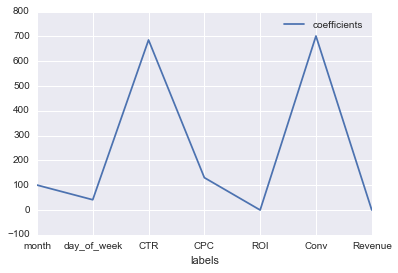

In [182]:
coef_df.plot();

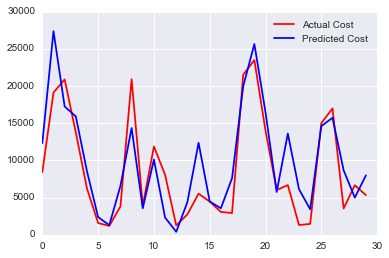

In [185]:
plt.plot(y_test.ravel(), c='r', label='Actual Cost')
plt.plot(preds.ravel(), c='b', label='Predicted Cost')
plt.legend(loc='best');

In [186]:
def differnce_in_roi(y_test, preds, revenue):
    actual_roi = revenue / ( 1 + y_test.ravel())
    predicted_roi = revenue / ( 1 + preds.ravel())
    
    return abs(actual_roi - predicted_roi)

In [199]:
actual_roi = X_test.Revenue.values / ( 1 + y_test.ravel())

In [200]:
predicted_roi = X_test.Revenue.values / ( 1 + preds.ravel())

In [202]:
print 'Difference in roi ', abs(predicted_roi - actual_roi).sum()

Difference in roi  41.0511252552
